In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans

%matplotlib inline

In [98]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [99]:
df.shape

(200, 5)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [101]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [102]:
for col in df.columns:
	print("Количество пустых значений в столбце", col, df[col].isna().sum())

Количество пустых значений в столбце CustomerID 0
Количество пустых значений в столбце Genre 0
Количество пустых значений в столбце Age 0
Количество пустых значений в столбце Annual Income (k$) 0
Количество пустых значений в столбце Spending Score (1-100) 0


In [103]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [104]:
df["Sex"] = df["Genre"].replace(['Male', 'Female'], [0, 1])
df.drop(columns=["Genre"], inplace=True)

In [105]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Sex
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [133]:
from sklearn.preprocessing import StandardScaler

col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]
s_scaler = StandardScaler().fit(features.values)
features = s_scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [107]:
scaled_features.join(df["Sex"])

,Annual Income (k$),Age,Spending Score (1-100),Sex
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1
...,...,...,...,...
195,2.268791,-0.276302,1.118061,1
196,2.497807,0.441365,-0.861839,1
197,2.497807,-0.491602,0.923953,0
198,2.917671,-0.491602,-1.250054,0


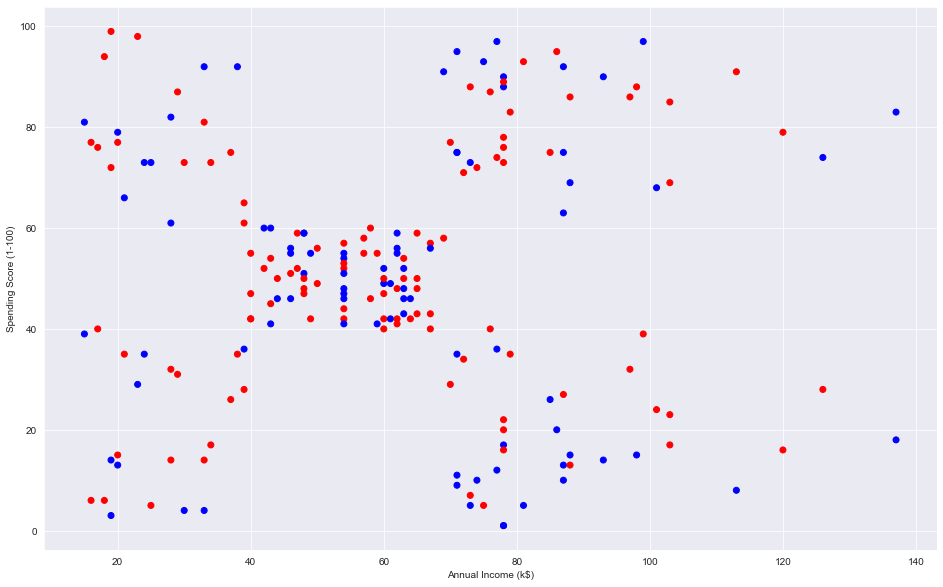

In [109]:
ann_income = df["Annual Income (k$)"]
spend_score = df["Spending Score (1-100)"]
colors = {0:"blue", 1:"red"}

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(x=ann_income, y=spend_score, c=df["Sex"].map(colors))
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")

plt.show()

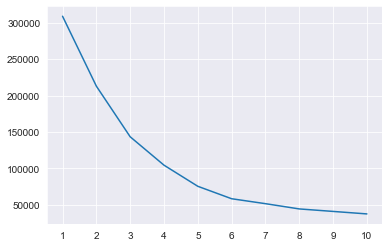

In [129]:
x = df[["Annual Income (k$)", "Spending Score (1-100)", "Age", "Sex"]]
# x = df.drop(columns=["CustomerID"])

wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(x)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.show()

In [130]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_pred = kmeans.fit_predict(x)

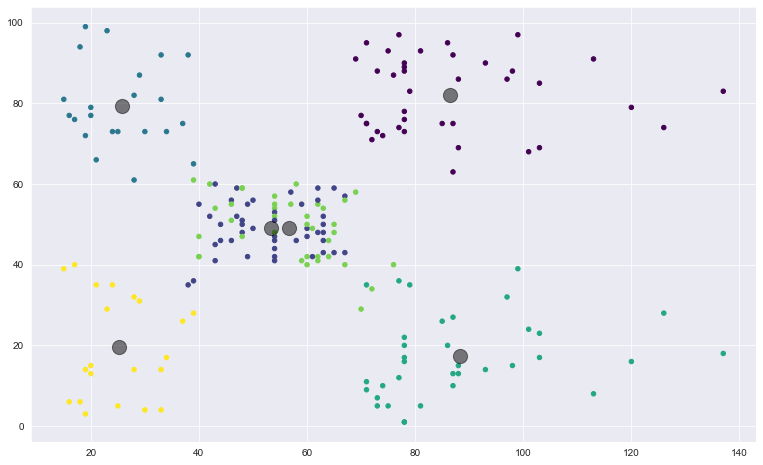

In [131]:
fig = plt.figure(figsize=(13, 8))
plt.scatter(x["Annual Income (k$)"], x["Spending Score (1-100)"], c=y_pred, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


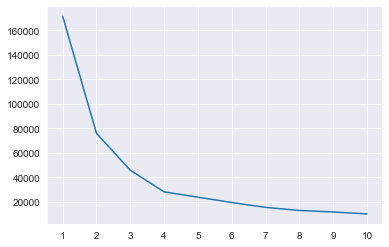

In [123]:
x = df[["Spending Score (1-100)", "Age"]]

wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(x)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.show()

In [124]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(x)

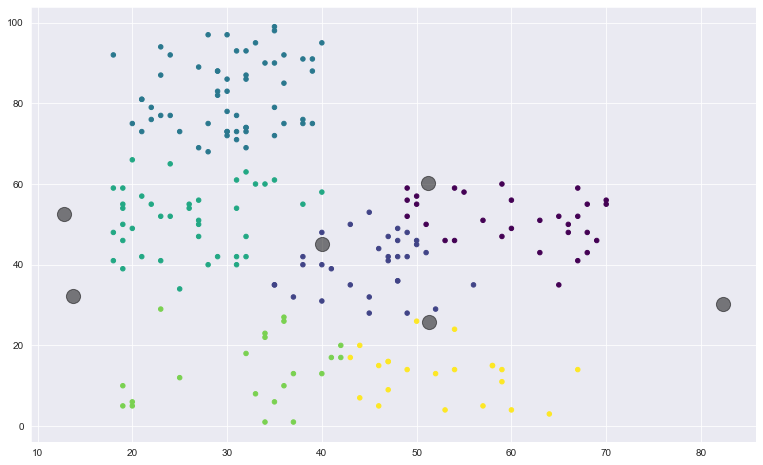

In [125]:
fig = plt.figure(figsize=(13, 8))
plt.scatter(y=x["Spending Score (1-100)"], x=x["Age"], c=y_pred, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [118]:
silhouette_score(x, y_pred)

0.49973941540141753

In [119]:
calinski_harabasz_score(x, y_pred)

332.5631268443306